In [19]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
aqi_2014=pd.read_pickle("./input/aqi_tw_2014.pkl")
aqi_2015=pd.read_pickle("./input/aqi_tw_2015.pkl")
aqi_2016=pd.read_pickle("./input/aqi_tw_2016.pkl")
aqi_2017=pd.read_pickle("./input/aqi_tw_2017.pkl")

In [4]:
len(aqi_2014)

564474

In [5]:
len(aqi_2015)

1233460

In [6]:
len(aqi_2016)

1402217

In [7]:
len(aqi_2017)

2091464

In [14]:
list(aqi_2014)

['index',
 'SITEID',
 'COUNTYID',
 'PSI',
 'POLLUTANT',
 'STATUS',
 'SO2',
 'CO',
 'O3',
 'PM10',
 'PM25',
 'NO2',
 'WINDSPEED',
 'WINDDIREC',
 'SO2_UNIT',
 'CO_UNIT',
 'O3_UNIT',
 'PM10_UNIT',
 'PM25_UNIT',
 'NO2_UNIT',
 'WINDSPEED_UNIT',
 'WINDDIREC_UNIT',
 'DATACREATIONDATE',
 'FPMI',
 'UPDATETIME',
 'TRANSACTIONID',
 'ISCONVERTED',
 'NO',
 'AQI',
 'O3_8HR',
 'UNIT',
 'CO_8HR',
 'PM10_AVG',
 'PM25_AVG',
 'NOX',
 'NO_VALUE',
 'FID']

In [16]:
import matplotlib.pyplot as plt

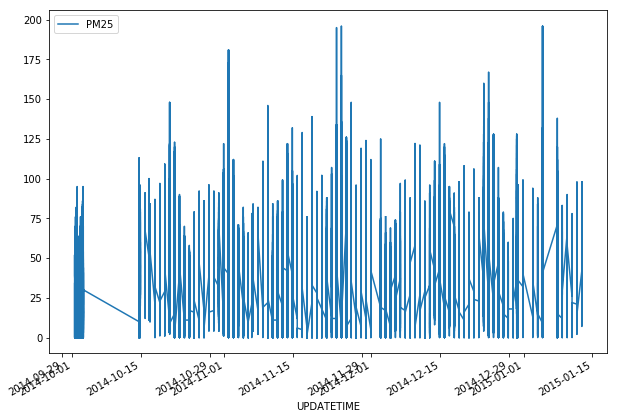

In [17]:
aqi_2014.plot(x='UPDATETIME',y='PM25',figsize=(10,7))

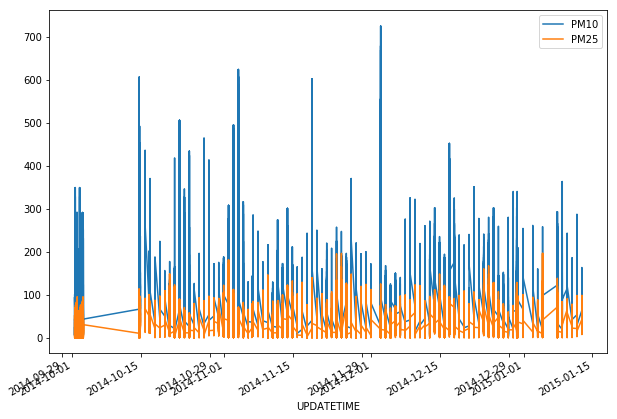

In [18]:
pm_subset=['PSI',
 'POLLUTANT',
 'STATUS',
 'SO2',
 'CO',
 'O3',
 'PM10',
 'PM25',
 'NO2']
aqi_2014.plot(x='UPDATETIME',y=['PM10','PM25'],figsize=(10,7))

In [20]:
#getting aqI from 2014-10-15 to 2014-12-31
aqi_2014_first=aqi_2014[(aqi_2014['UPDATETIME'] < datetime(2015,1,1)) &
         (aqi_2014['UPDATETIME'] > datetime(2014,10,15))]
#geting only taipei data
aqi_2014_first_taipei=aqi_2014_first[aqi_2014_first['COUNTYID'] == 63000]

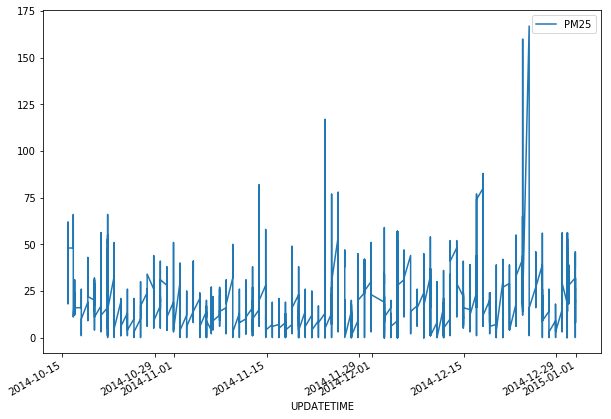

In [21]:
aqi_2014_first_taipei.plot(x='UPDATETIME',y='PM25',figsize=(10,7))

In [22]:
#getting aqI from 2017-01-01 to 2017-01-31
aqi_2017_first=aqi_2017[(aqi_2017['UPDATETIME'] < datetime(2017,2,1)) &
         (aqi_2017['UPDATETIME'] > datetime(2017,1,1))]
#geting only taipei data
aqi_2017_first_taipei=aqi_2017_first[aqi_2017_first['COUNTYID'] == 63000]

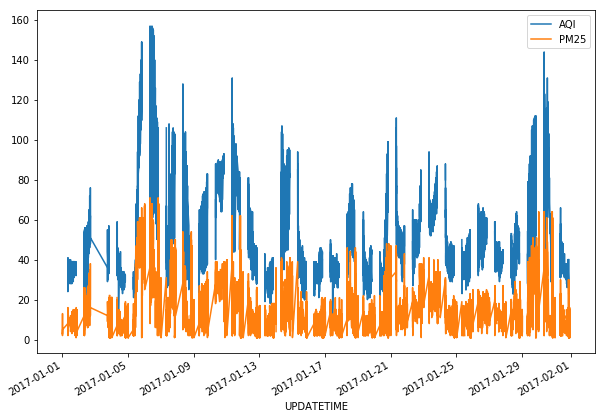

In [23]:
aqi_2017_first_taipei.plot(x='UPDATETIME',y=['AQI','PM25'],figsize=(10,7))